# Загрузка данных

In [1]:
import pandas as pd
agora_data = pd.read_json('agora_hack_products.json')
agora_data

,product_id,name,props,is_reference,reference_id
0,0007302f2fe1d54d,Классическая сплит-система ROYAL CLIMA PANDORA...,"[Класс энергоэффективности\tA, Мощность конд...",False,f497219eb0077f84
1,000740b6c1cc763e,Смартфон Xiaomi Redmi Note 10S NFC 6/128 ГБ RU...,"[Экран\t6.43"" (2400x1080) AMOLED 60 Гц, 4 каме...",True,None
2,0039af5efceac4ab,Холодильник Бирюса 118,[Мощность замораживания 4 кг/сутки],False,28085e941cde1639
3,004f2158acb8165c,ASUS TUF-GTX1660S-O6G-GAMING Видеокарта,"[Объем видеопамяти\t6144 МБ, Частота памяти\...",False,9afe55bb4bf1e8a8
4,005cddb29e1677ec,"Кофемашина Saeco Lirika One Touch Cappuccino, ...","[Приготовление капучино\tавтоматическое, Мате...",False,1f21918ceb5d345c
...,...,...,...,...,...
3246,ff5da4be6fa60c4b,"15.6"" Ноутбук Lenovo IdeaPad Gaming 315IHU6 19...","[Видеокарта\tNVIDIA GeForce RTX 3050 4 ГБ, Вре...",True,None
3247,ff66532467a02652,Моющий робот-пылесос для дома и квартиры Xiaom...,"[Объем контейнера для воды\t0.27 л, ШхГхВ\t35....",False,d4ebc4a26700d5e0
3248,ff75ade409f4da7e,"Huawei Умный браслет Band 7, графитово-черный","[Модификация\tGPS, Материал корпуса\tпластик]",False,177ccb3b84125efa
3249,ffb770de0c2feafc,Видеокарта Gigabyte GV-R675XTGAMING OC-12GD 12...,[Комплектация\tRetail],False,a07d5538ebec8e36


## Разделение данных на ТОВАРЫ(agora_data_goods) и ЭТАЛОНЫ(agora_data_prime)

In [2]:
agora_data_goods = agora_data[agora_data['is_reference'] == False]
agora_data_goods = agora_data_goods.reset_index()
agora_data_goods.count()

index           2780
product_id      2780
name            2780
props           2780
is_reference    2780
reference_id    2780
dtype: int64

In [3]:
agora_data_prime = agora_data[agora_data['is_reference'] == True]
agora_data_prime = agora_data_prime.reset_index()
agora_data_prime.count()

index           471
product_id      471
name            471
props           471
is_reference    471
reference_id      0
dtype: int64

## Статистика по упоминаниям эталонов

In [4]:
agora_data_goods['reference_id'].value_counts()

116c9e6140857b4b    37
d4ebc4a26700d5e0    34
d7d28d1201ba8bde    22
b91a686bdeee3b59    22
b6f6e9b5ead263ae    21
                    ..
c23587593162a13a     1
53a206146d4ecba5     1
e2e227ddf732c1ca     1
c24becbb7f823904     1
d82bc0afa73ab4e0     1
Name: reference_id, Length: 471, dtype: int64

# Тренировка и тест

In [5]:
import numpy as np
from tqdm import tqdm
from math import floor

In [6]:
class_idx = {i: 0 for i in np.unique(agora_data_goods['reference_id'])}
X_train = {i: [] for i in agora_data_goods.columns if i != 'is_reference' and i != 'index'}
X_test = {i: [] for i in agora_data_goods.columns if i != 'is_reference' and i != 'index'}

class_len = {i : floor(agora_data_goods['reference_id'].value_counts()[i]*0.7)+1 for i in np.unique(agora_data_goods['reference_id'])}

for i in tqdm(range(agora_data_goods.shape[0])):
    if class_idx[agora_data_goods['reference_id'][i]] < class_len[agora_data_goods['reference_id'][i]]:
        # TRAIN
        class_idx[agora_data_goods['reference_id'][i]] += 1
        for j in X_train.keys():
            X_train[j].append(agora_data_goods[j][i])
    else:
        # TEST
        for j in X_test.keys():
            X_test[j].append(agora_data_goods[j][i])

X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)

100%|██████████| 2780/2780 [00:00<00:00, 21718.42it/s]


## Сравнение кол-ва элементов в тренировочных данных(CLASS_IDX) с расчитанным(CLASS_LEN)

In [7]:
for i in class_len.keys():
    if class_len[i]-class_idx[i]:
        print(f'{i}: {class_len[i]-class_idx[i]}')

In [8]:
X_train

,product_id,name,props,reference_id
0,0007302f2fe1d54d,Классическая сплит-система ROYAL CLIMA PANDORA...,"[Класс энергоэффективности\tA, Мощность конд...",f497219eb0077f84
1,0039af5efceac4ab,Холодильник Бирюса 118,[Мощность замораживания 4 кг/сутки],28085e941cde1639
2,004f2158acb8165c,ASUS TUF-GTX1660S-O6G-GAMING Видеокарта,"[Объем видеопамяти\t6144 МБ, Частота памяти\...",9afe55bb4bf1e8a8
3,005cddb29e1677ec,"Кофемашина Saeco Lirika One Touch Cappuccino, ...","[Приготовление капучино\tавтоматическое, Мате...",1f21918ceb5d345c
4,0083dddef6bc6503,Lenovo 62A8KAT1EU Монитор,[Яркость\t250 кд/м²; контрастность: 1000:1],8f9c8fcf9cb2862c
...,...,...,...,...
2221,fa06227ed7b42bba,Посудомоечная машина Weissgauff BDW 4004,"[Таймер отсрочки запуска\tесть, Тип защиты от ...",79365b00febf391b
2222,fa3b915603e2839e,Монитор Xiaomi Mi Desktop Monitor 27'' RMMNT27...,"[Экран\t1920x1080 (16:9), Покрытие экрана\tма...",13a23947cc15cfe7
2223,fc7ac235b0c1149c,Холодильник GA-B379SLUL LG,"[Общий объем 261 л, Режимы суперзаморозка, Тип...",b435b4515808e799
2224,feb6f146f3be1ccb,Водонагреватель ariston накопительный водонагр...,"[Индикация\tвключения, Максимальная температур...",8e2012bfdbccf188


In [9]:
X_test

,product_id,name,props,reference_id
0,5a2c33cfdcfed0bf,Микроволновая Печь LG MW23R35GIB 23л. 1000Вт ч...,"[ШхВхГ\t47.60х27.20х35.70 см, Особенности дис...",d5f74488ca1cd971
1,5ed043525402739b,Микроволновая печь Samsung GE88SUW,"[Переключатели\tкнопочные, Диаметр поддона\t28...",35dcbf60d7bbfcee
2,6313f01fc284a991,"Монитор Lenovo 27"" G27c-10","[Покрытие экрана\tантибликовое, Яркость\t350 к...",b941b65ba33a29a0
3,6c771f855302401c,Плита индукционная HYC-0105 (настольная) бел. ...,"[Управление\tэлектронное, Настольная\tда, Макс...",f67deaee31597443
4,6d25f706b0a5bc3d,"LCD Lenovo 23.8"" C24-20 [62A8KAT1EU] {VA 1920x...","[Тип матрицы\t*VA, Интерфейсы вход VGA, вход...",8f9c8fcf9cb2862c
...,...,...,...,...
549,ff41c1fd202a04a8,Сплит-система серии Royal Clima серии PANDORA ...,"[Фильтры дезодорирующий, с ионами серебра]",f497219eb0077f84
550,ff5817621cf6b627,Samsung Galaxy Note 20 Ultra Samsung Смартфон ...,"[Экран\t6.9"" (3088x1440) Dynamic AMOLED 120 Гц...",7c078e4143695811
551,ff66532467a02652,Моющий робот-пылесос для дома и квартиры Xiaom...,"[Объем контейнера для воды\t0.27 л, ШхГхВ\t35....",d4ebc4a26700d5e0
552,ffb770de0c2feafc,Видеокарта Gigabyte GV-R675XTGAMING OC-12GD 12...,[Комплектация\tRetail],a07d5538ebec8e36


# Статистика по тренировочной выборке

116c9e6140857b4b    26
d4ebc4a26700d5e0    24
d7d28d1201ba8bde    16
b91a686bdeee3b59    16
6ba3b74a1ca138cf    15
                    ..
d82bc0afa73ab4e0     1
c24becbb7f823904     1
e2e227ddf732c1ca     1
53a206146d4ecba5     1
c23587593162a13a     1
Name: reference_id, Length: 471, dtype: int64


<AxesSubplot:>

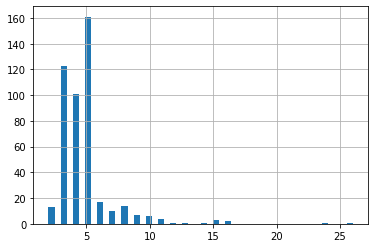

In [10]:
trainx = X_train['reference_id'].value_counts()
print(trainx)
trainx[trainx.values!=1].hist(bins=50)

### Проверка, что все labels(reference id) из теста есть в тренировке

In [11]:
for i in X_test['reference_id'].value_counts().keys():
    if i not in list(X_train['reference_id'].value_counts().keys()):
        1/0

Конец разделения данных

------

# Объединение name и props в данных

In [12]:
def preproc_str(df_row, idx):
    a = '. '.join(df_row['props'][idx])
    a = ' '.join(a.split('\t'))

    return df_row['name'][idx] + '. ' + a+'.'

In [14]:
def shortData(data, name: str):
    merged = []
    for i in range(data.shape[0]):
        merged.append(preproc_str(data, i))

    data['merged'] = merged
    
    shortData = pd.DataFrame(data={i: data[i] for i in data.columns if i != 'name' and i != 'props'})

    shortData.to_csv(name+".csv", index=False)

# Сохранение сокращенных данных

In [15]:
shortData(X_train, 'train')
shortData(X_test, 'test')

In [21]:
print(np.unique(agora_data_goods['reference_id'].value_counts().keys(), return_index=True))

(array(['000740b6c1cc763e', '0083737f904dd9a9', '01378fa92f901df5',
       '01601abb0bf5133d', '01a28e17323d6ef8', '01e52344308143f6',
       '0229abcf2ded1058', '05a95e7066dc4c52', '05cb692a7fd6c0e6',
       '05d4f6d7e4fe8c4b', '0607c04000d78548', '070dd48327cad4d5',
       '0793124d86c65dc5', '07be2569f73bd6b7', '07d12ec5a962c925',
       '08516de8de755f62', '08d814610482da4a', '09824205ce94d7c9',
       '0ab98256ef22b592', '0ac565ce3bfa280b', '0be9800a9a538231',
       '0c5ac0f8d296c43a', '0cb3fc4ae2e1d6fd', '0db4a3bd5db1f203',
       '0e98903bc50f96a4', '0faf2717bf811454', '100949e164af5333',
       '108edf8f1054d7d4', '1112102ced6b29fe', '116a0dea1a4ff02d',
       '116c9e6140857b4b', '11777853e7c22618', '117f01fe96fc2b89',
       '11ec463047d7bc56', '1253c3296a3c0153', '125544c9cc07456f',
       '1320d9871e0e41e1', '13238d78e9f5777f', '13a23947cc15cfe7',
       '13bffaadb1f61ba8', '13f78f44e27fec08', '14d7de09535f5f24',
       '15045e15063ca106', '15cb3a27705c8a79', '160fedb205c7f